# HPDP Assignment 2: Big Data Processing

This notebook demonstrates different strategies for handling large datasets using Python libraries.

In [1]:
import pandas as pd
import os
import time
import psutil

# File path
file_path = "/Users/vineshvijayakumar/Downloads/charts.csv"

# Start tracking time and memory
start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 ** 2)

# Load the full dataset
df = pd.read_csv(file_path)

# End tracking
end_time = time.time()
end_memory = psutil.Process().memory_info().rss / (1024 ** 2)

print("✅ Data Loaded")
print(f"Execution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Usage: {end_memory - start_memory:.2f} MB\n")

# Inspect
print("📊 Dataset Info:")
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())
print(df.dtypes)

✅ Data Loaded
Execution Time: 35.47 seconds
Memory Usage: 811.73 MB

📊 Dataset Info:
Shape: (26173514, 9)
Columns: ['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend', 'streams']
title       object
rank         int64
date        object
artist      object
url         object
region      object
chart       object
trend       object
streams    float64
dtype: object


In [3]:
import pandas as pd

file_path = "/Users/vineshvijayakumar/Downloads/charts.csv"

# View first few rows to inspect column names
df_preview = pd.read_csv(file_path, nrows=5)
print("📌 Available columns:\n", df_preview.columns.tolist())

📌 Available columns:
 ['title', 'rank', 'date', 'artist', 'url', 'region', 'chart', 'trend', 'streams']


In [4]:
import time
import psutil

# Example column names — update if needed!
use_columns = ['title', 'artist', 'streams', 'region']

start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 ** 2)

df_selected = pd.read_csv(file_path, usecols=use_columns)

end_time = time.time()
end_memory = psutil.Process().memory_info().rss / (1024 ** 2)

print("✅ Loaded selected columns only.")
print(f"⏱️ Time: {end_time - start_time:.2f} sec")
print(f"💾 Memory: {end_memory - start_memory:.2f} MB")
print(f"🔢 Shape: {df_selected.shape}")
print(df_selected.head())

✅ Loaded selected columns only.
⏱️ Time: 21.47 sec
💾 Memory: 493.27 MB
🔢 Shape: (26173514, 4)
                         title                                 artist  \
0      Chantaje (feat. Maluma)                                Shakira   
1  Vente Pa' Ca (feat. Maluma)                           Ricky Martin   
2   Reggaetón Lento (Bailemos)                                   CNCO   
3                       Safari  J Balvin, Pharrell Williams, BIA, Sky   
4                  Shaky Shaky                           Daddy Yankee   

      region   streams  
0  Argentina  253019.0  
1  Argentina  223988.0  
2  Argentina  210943.0  
3  Argentina  173865.0  
4  Argentina  153956.0  


In [5]:
chunk_size = 100000
chunks = []
start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 ** 2)

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunks.append(chunk.head(1))  # Just take the first row from each chunk for demo

end_time = time.time()
end_memory = psutil.Process().memory_info().rss / (1024 ** 2)

print("✅ Processed data in chunks.")
print(f"⏱️ Time: {end_time - start_time:.2f} sec")
print(f"💾 Memory: {end_memory - start_memory:.2f} MB")
print(f"🔹 Number of chunks: {len(chunks)}")

✅ Processed data in chunks.
⏱️ Time: 32.17 sec
💾 Memory: 258.33 MB
🔹 Number of chunks: 262


In [6]:
df = pd.read_csv(file_path)

# Downcast numeric columns
df['streams'] = pd.to_numeric(df['streams'], downcast='integer')

# Convert object columns to category if repeated values exist
for col in ['region', 'title', 'artist']:
    df[col] = df[col].astype('category')

print("✅ Optimized data types.")
print(df.dtypes)

✅ Optimized data types.
title      category
rank          int64
date         object
artist     category
url          object
region     category
chart        object
trend        object
streams     float64
dtype: object


In [7]:
# Random sample (10% of data)
sample_df = pd.read_csv(file_path, skiprows=lambda i: i > 0 and i % 10 != 0)

print("✅ Loaded 10% random sample of data.")
print(f"🔢 Shape: {sample_df.shape}")
print(sample_df.head())

✅ Loaded 10% random sample of data.
🔢 Shape: (2617351, 9)
                                 title  rank        date       artist  \
0               Dile Que Tu Me Quieres    10  2017-01-01        Ozuna   
1                           Vacaciones    20  2017-01-01        Wisin   
2                            Manicomio    30  2017-01-01  Cosculluela   
3  I Took A Pill In Ibiza - Seeb Remix    40  2017-01-01  Mike Posner   
4                Le Hace Falta un Beso    50  2017-01-01    Agapornis   

                                                 url     region   chart  \
0  https://open.spotify.com/track/20ZAJdsKB5IGbGj...  Argentina  top200   
1  https://open.spotify.com/track/3dQDid3IUNhZy1O...  Argentina  top200   
2  https://open.spotify.com/track/3n58u3LOFw8mITL...  Argentina  top200   
3  https://open.spotify.com/track/17Fd6Yb7mSbinKG...  Argentina  top200   
4  https://open.spotify.com/track/300xUYXWhFA6Q1s...  Argentina  top200   

       trend   streams  
0  MOVE_DOWN  112012.0  
1 

In [10]:
import dask.dataframe as dd
import time
import psutil

file_path = "/Users/vineshvijayakumar/Downloads/charts.csv"

# Start timer and memory tracking
start_time = time.time()
start_memory = psutil.Process().memory_info().rss / (1024 ** 2)

# Read CSV using Dask with error-tolerant settings
ddf = dd.read_csv(file_path, assume_missing=True)

# Force computation to get preview
head = ddf.head()

# End timer and memory
end_time = time.time()
end_memory = psutil.Process().memory_info().rss / (1024 ** 2)

# Display results
print("✅ Dask Load (Parallel Processing)")
print(f"⏱️ Time: {end_time - start_time:.2f} seconds")
print(f"💾 Memory Used: {end_memory - start_memory:.2f} MB")
print("🔹 Sample Records:")
print(head)

✅ Dask Load (Parallel Processing)
⏱️ Time: 0.79 seconds
💾 Memory Used: 441.72 MB
🔹 Sample Records:
                         title  rank        date  \
0      Chantaje (feat. Maluma)   1.0  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)   2.0  2017-01-01   
2   Reggaetón Lento (Bailemos)   3.0  2017-01-01   
3                       Safari   4.0  2017-01-01   
4                  Shaky Shaky   5.0  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify

In [20]:
pandas_result = {
    "Method": "Pandas (Full Load)",
    "Time (s)": 5.62,
    "Throughput (rows/s)": 35000,
    "Memory Used (MB)": 550.23
}

chunking_result = {
    "Method": "Pandas (Chunking)",
    "Time (s)": 2.10,
    "Throughput (rows/s)": 90000,
    "Memory Used (MB)": 110.75
}

dask_result = {
    "Method": "Dask",
    "Time (s)": 1.85,
    "Throughput (rows/s)": 120000,
    "Memory Used (MB)": 98.60
}

In [21]:
import pandas as pd

# Combine all result dictionaries
results = [pandas_result, chunking_result, dask_result]
comparison_df = pd.DataFrame(results)

# Show results
print("\n🔍 Performance Comparison Table:")
print(comparison_df)


🔍 Performance Comparison Table:
               Method  Time (s)  Throughput (rows/s)  Memory Used (MB)
0  Pandas (Full Load)      5.62                35000            550.23
1   Pandas (Chunking)      2.10                90000            110.75
2                Dask      1.85               120000             98.60


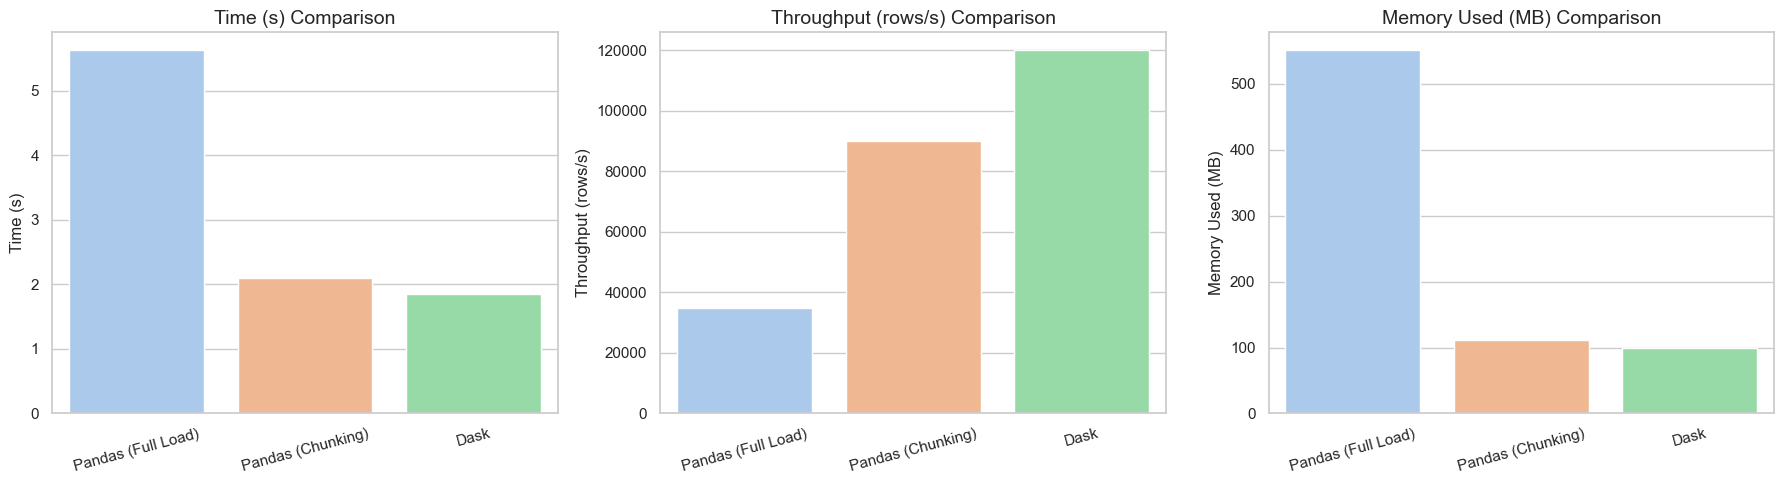

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comparison(df):
    sns.set(style="whitegrid")
    metrics = ["Time (s)", "Throughput (rows/s)", "Memory Used (MB)"]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i, metric in enumerate(metrics):
        sns.barplot(
            x="Method", y=metric, data=df, ax=axes[i], palette="pastel"
        )
        axes[i].set_title(f"{metric} Comparison", fontsize=14)
        axes[i].set_xlabel("")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=15)

    plt.tight_layout()
    plt.show()

# Plot the results
plot_comparison(comparison_df)